In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
df = pd.read_excel(r"https://catalogue.data.gov.bc.ca/dataset/f9566991-eb97-49a9-a587-5f0725024985/resource/1f9201f4-ff39-488a-922d-7d53ad5d2fdc/download/job-openings-by-noc-and-skill-cluster.xlsx")

In [2]:
df.head()

,NOC,Description,Occ Group: Skills Cluster,LMO Job Openings 2023-2033
0,#10010,Financial managers,Sales and administration,3513.09
1,#10011,Human resources managers,People management,3372.10
2,#10012,Purchasing managers,People management,1743.91
3,#10019,Other administrative services managers,Sales and administration,3295.69
4,#10020,"Insurance, real estate and financial brokerage...",Sales and administration,3189.88


In [20]:
# Basic information
print("Basic Information:")
print(df.info())
print()

# Unique values in each column
print("Unique Values in Each Column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")
print()

# Top occupations by job openings
top_occupations = df.sort_values(by='LMO Job Openings 2023-2033', ascending=False).head(5)
print("Top 5 Occupations by Job Openings 2023-2033:")
print(top_occupations[['NOC', 'Description', 'LMO Job Openings 2023-2033']])
print()

# Group by 'Occ Group: Skills Cluster' and aggregate
grouped = df.groupby('Occ Group: Skills Cluster')['LMO Job Openings 2023-2033'].sum().reset_index().sort_values(by=['LMO Job Openings 2023-2033'], ascending=False )
print("Total Job Openings by Skills Cluster:")
print(grouped)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NOC                         501 non-null    object 
 1   Description                 501 non-null    object 
 2   Occ Group: Skills Cluster   501 non-null    object 
 3   LMO Job Openings 2023-2033  501 non-null    float64
dtypes: float64(1), object(3)
memory usage: 15.8+ KB
None

Unique Values in Each Column:
NOC: 501 unique values
Description: 501 unique values
Occ Group: Skills Cluster: 11 unique values
LMO Job Openings 2023-2033: 500 unique values

Top 5 Occupations by Job Openings 2023-2033:
        NOC                                        Description  \
253  #60020                Retail and wholesale trade managers   
279  #64100       Retail salespersons and visual merchandisers   
141  #31301  Registered nurses and registered psychiatric 

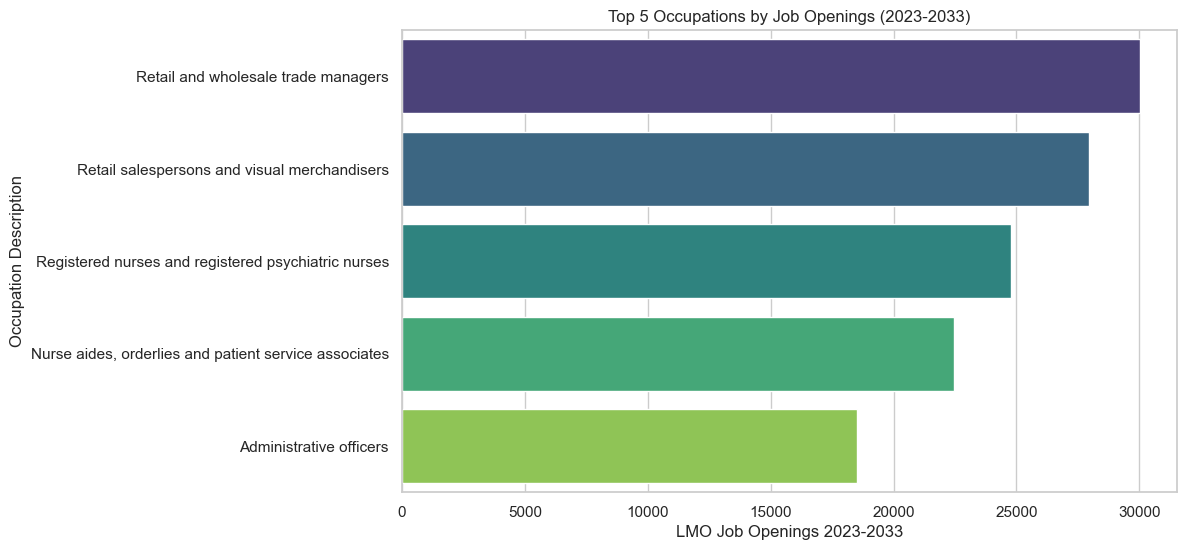

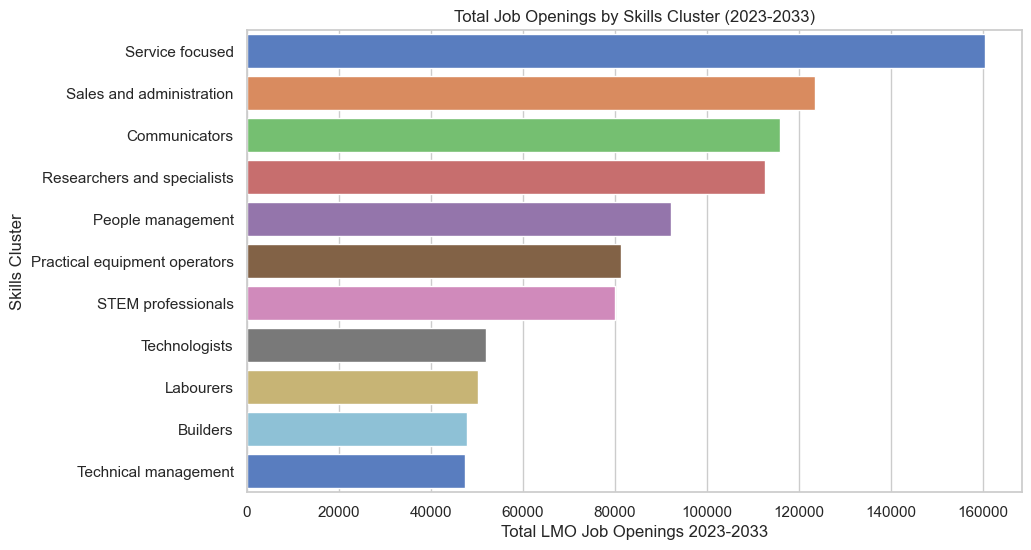

In [21]:
# Visualizations
sns.set(style="whitegrid")

# Bar plot for the top occupations by job openings
plt.figure(figsize=(10, 6))
sns.barplot(x='LMO Job Openings 2023-2033', y='Description', data=top_occupations, palette='viridis')
plt.title('Top 5 Occupations by Job Openings (2023-2033)')
plt.xlabel('LMO Job Openings 2023-2033')
plt.ylabel('Occupation Description')
plt.show()

# Bar plot for total job openings by skills cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='LMO Job Openings 2023-2033', y='Occ Group: Skills Cluster', data=grouped, palette='muted')
plt.title('Total Job Openings by Skills Cluster (2023-2033)')
plt.xlabel('Total LMO Job Openings 2023-2033')
plt.ylabel('Skills Cluster')
plt.show()


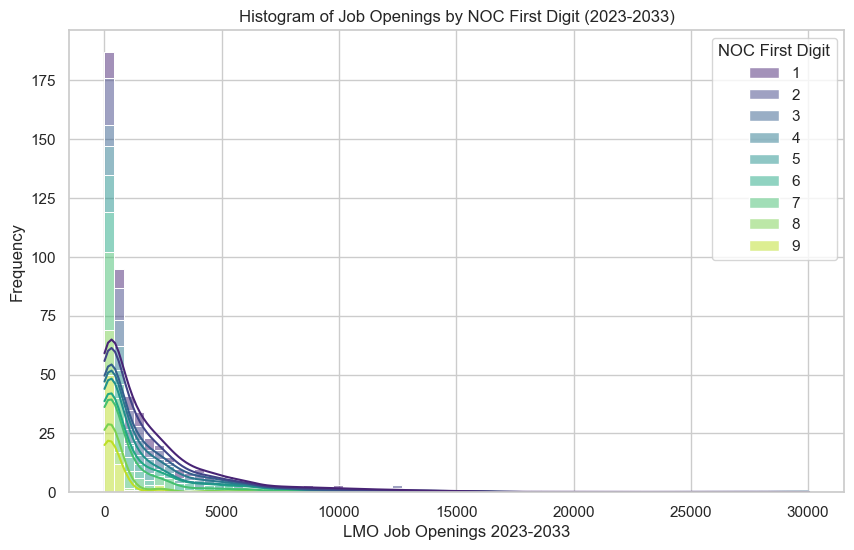

In [23]:
# Extract the first digit of the NOC
df['NOC First Digit'] = df['NOC'].str[1]

# Histogram of job openings by NOC first digit
plt.figure(figsize=(10, 6))
sns.histplot(df, x='LMO Job Openings 2023-2033', hue='NOC First Digit', multiple='stack', palette='viridis', kde=True)
plt.title('Histogram of Job Openings by NOC First Digit (2023-2033)')
plt.xlabel('LMO Job Openings 2023-2033')
plt.ylabel('Frequency')
plt.show()

Total Job Openings by NOC First Digit:
  NOC First Digit  LMO Job Openings 2023-2033
0               1                   174448.43
1               2                   108726.37
2               3                    98174.99
3               4                   115199.24
4               5                    39524.22
5               6                   225003.65
6               7                   153369.56
7               8                    16587.07
8               9                    33065.29


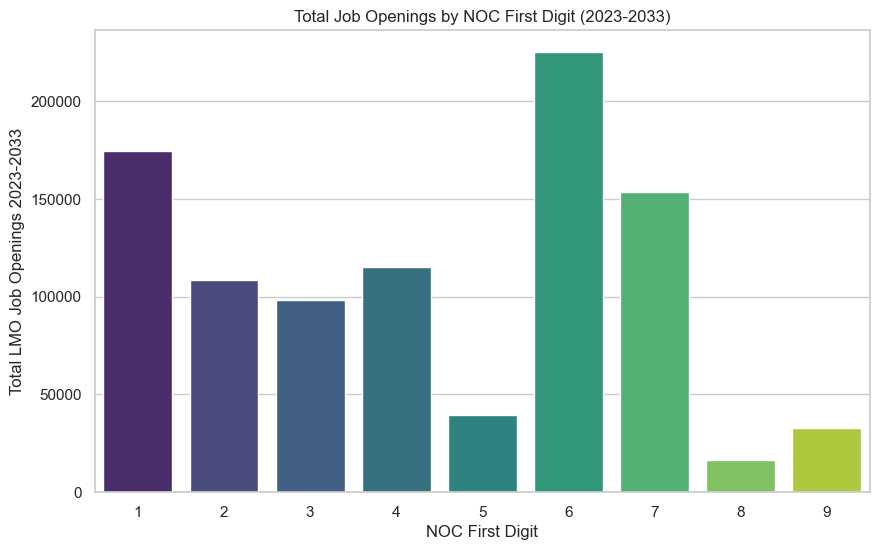

In [25]:
# Group by 'NOC First Digit' and aggregate
noc_grouped = df.groupby('NOC First Digit')['LMO Job Openings 2023-2033'].sum().reset_index()
print("Total Job Openings by NOC First Digit:")
print(noc_grouped)

# Bar plot for total job openings by NOC first digit
plt.figure(figsize=(10, 6))
sns.barplot(x='NOC First Digit', y='LMO Job Openings 2023-2033', data=noc_grouped, palette='viridis')
plt.title('Total Job Openings by NOC First Digit (2023-2033)')
plt.xlabel('NOC First Digit')
plt.ylabel('Total LMO Job Openings 2023-2033')
plt.show()

0 Legislative and senior management occupations
1 Business, finance and administration occupations
2 Natural and applied sciences and related occupations
3 Health occupations
4 Occupations in education, law and social, community and government services
5 Occupations in art, culture, recreation and sport
6 Sales and service occupations
7 Trades, transport and equipment operators and related occupations
8 Natural resources, agriculture and related production occupations
9 Occupations in manufacturing and utilities